In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



df = pd.read_csv('raw.githubusercontent.com_jbrownlee_Datasets_master_daily-min-temperatures.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

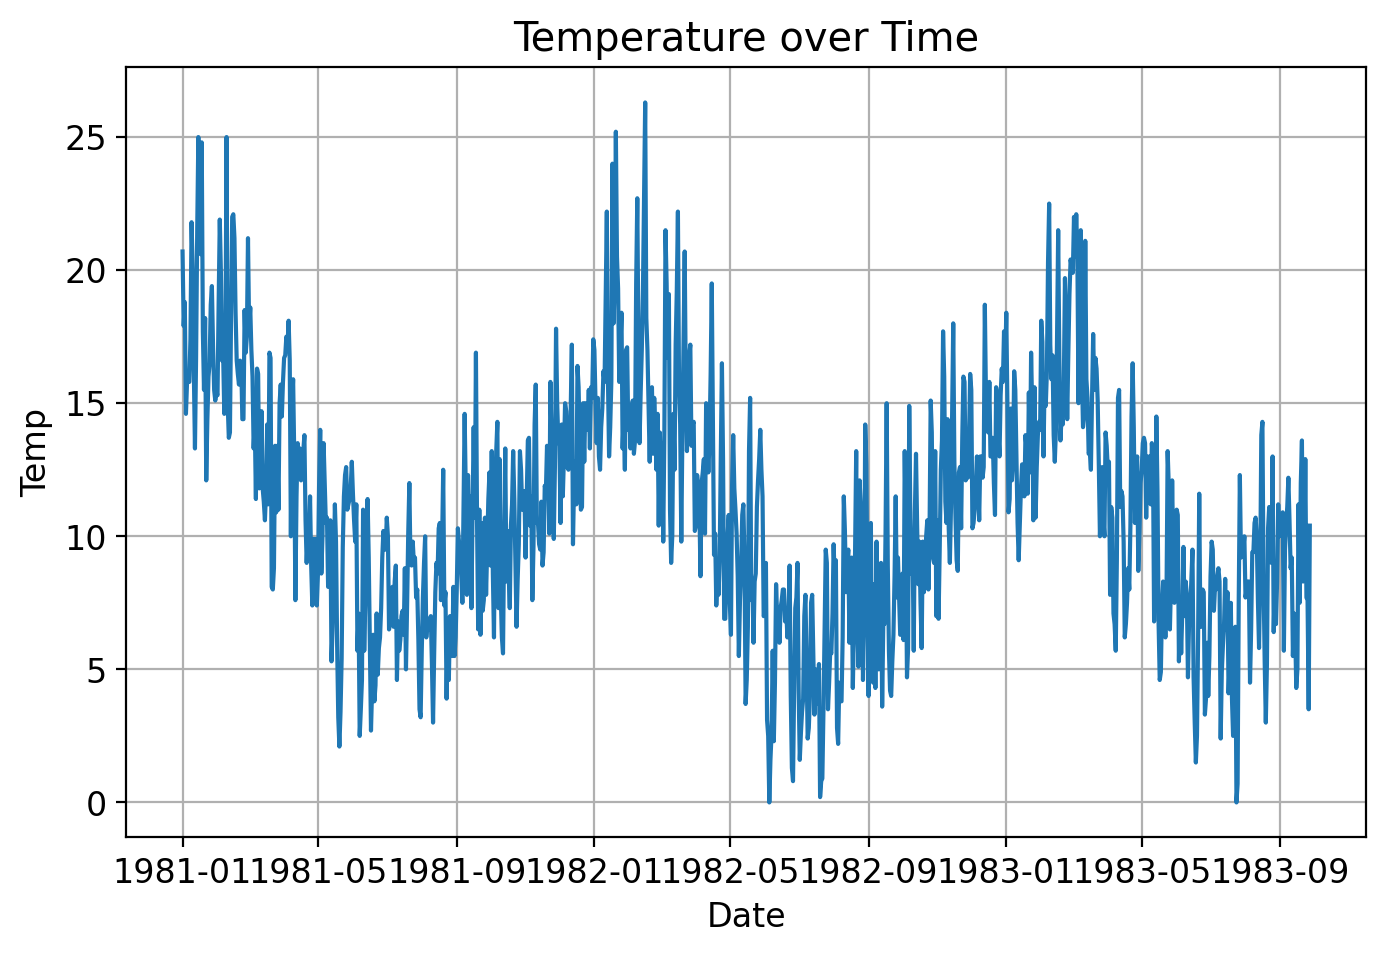

In [3]:
# Leave only first 1000 rows in dataset
df = df[:1000]
plt.plot(df['Date'], df['Temp'])
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

In [4]:
df2 = pd.read_csv('BBG00B3T3HD3.csv')[:1000]

In [5]:
def fourier(series):
    fft_result = np.fft.fft(series)
    # Вычисляем абсолютные значения (для получения мощности)
    fft_abs = np.abs(fft_result) / series.size
    # Вычисляем частоты (в Гц)
    freqs = np.fft.fftfreq(series.size, d=15 * 60)
    idx_stock = np.argmax(freqs < 0)
    # Строим график мощности гармоник
    plt.figure(figsize=(10, 5))
    plt.plot(fft_abs[1:idx_stock])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Spectrum')
    plt.show()

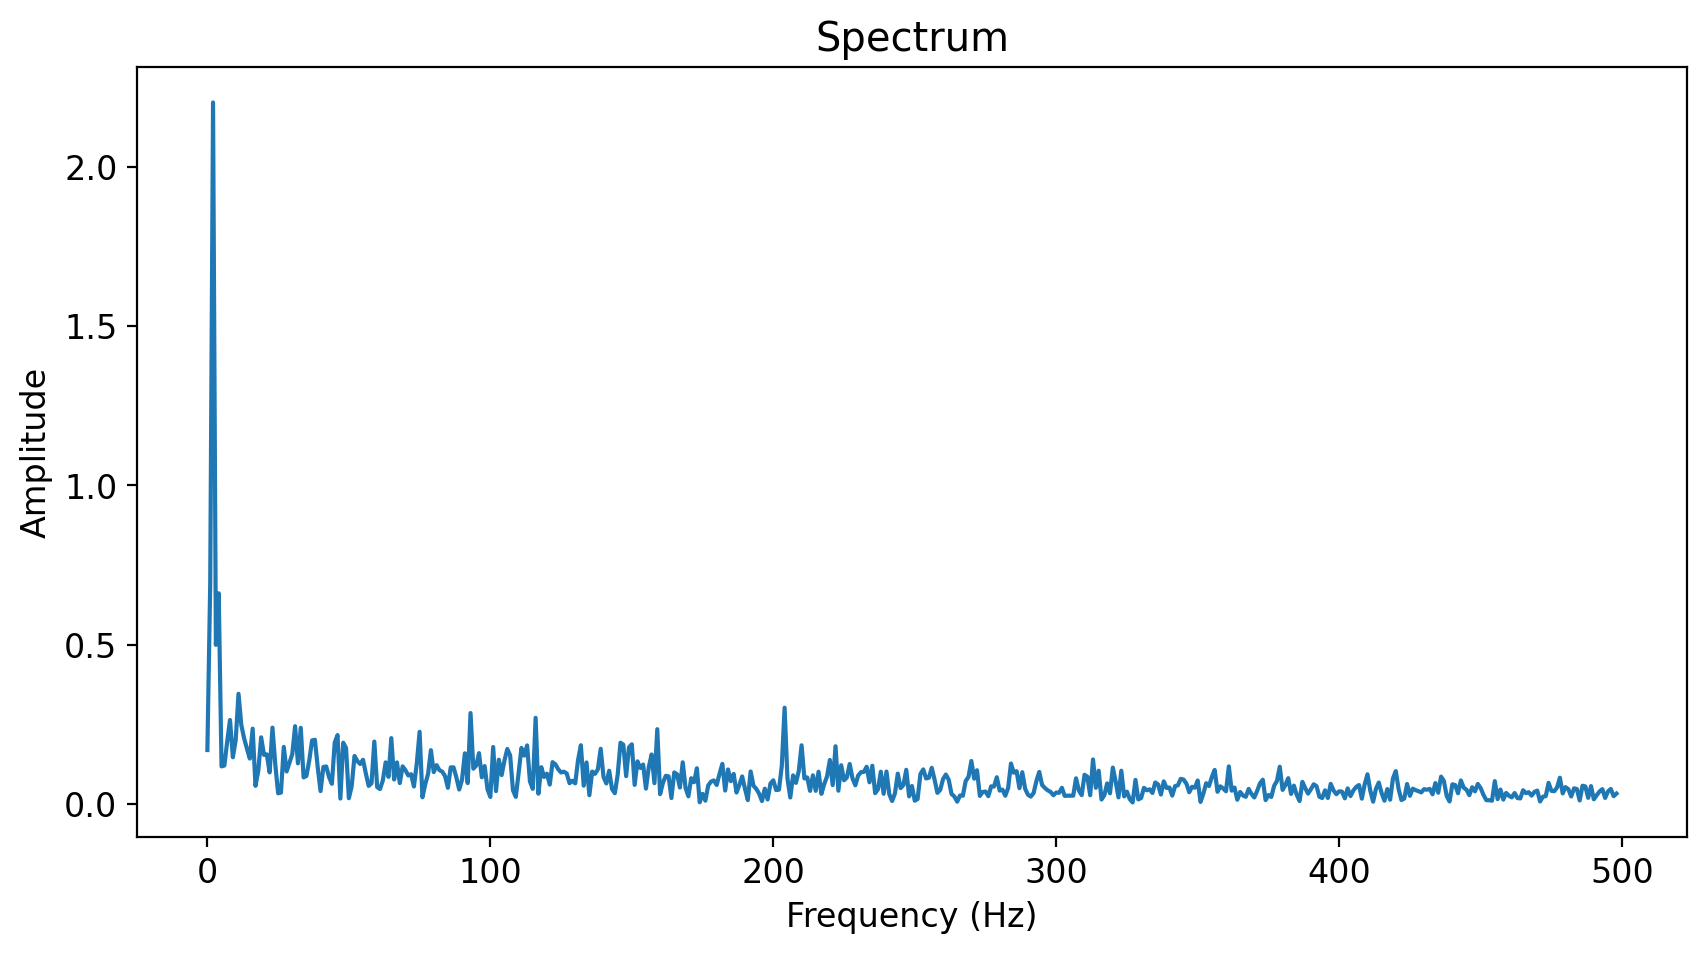

In [6]:
fourier(df['Temp'])

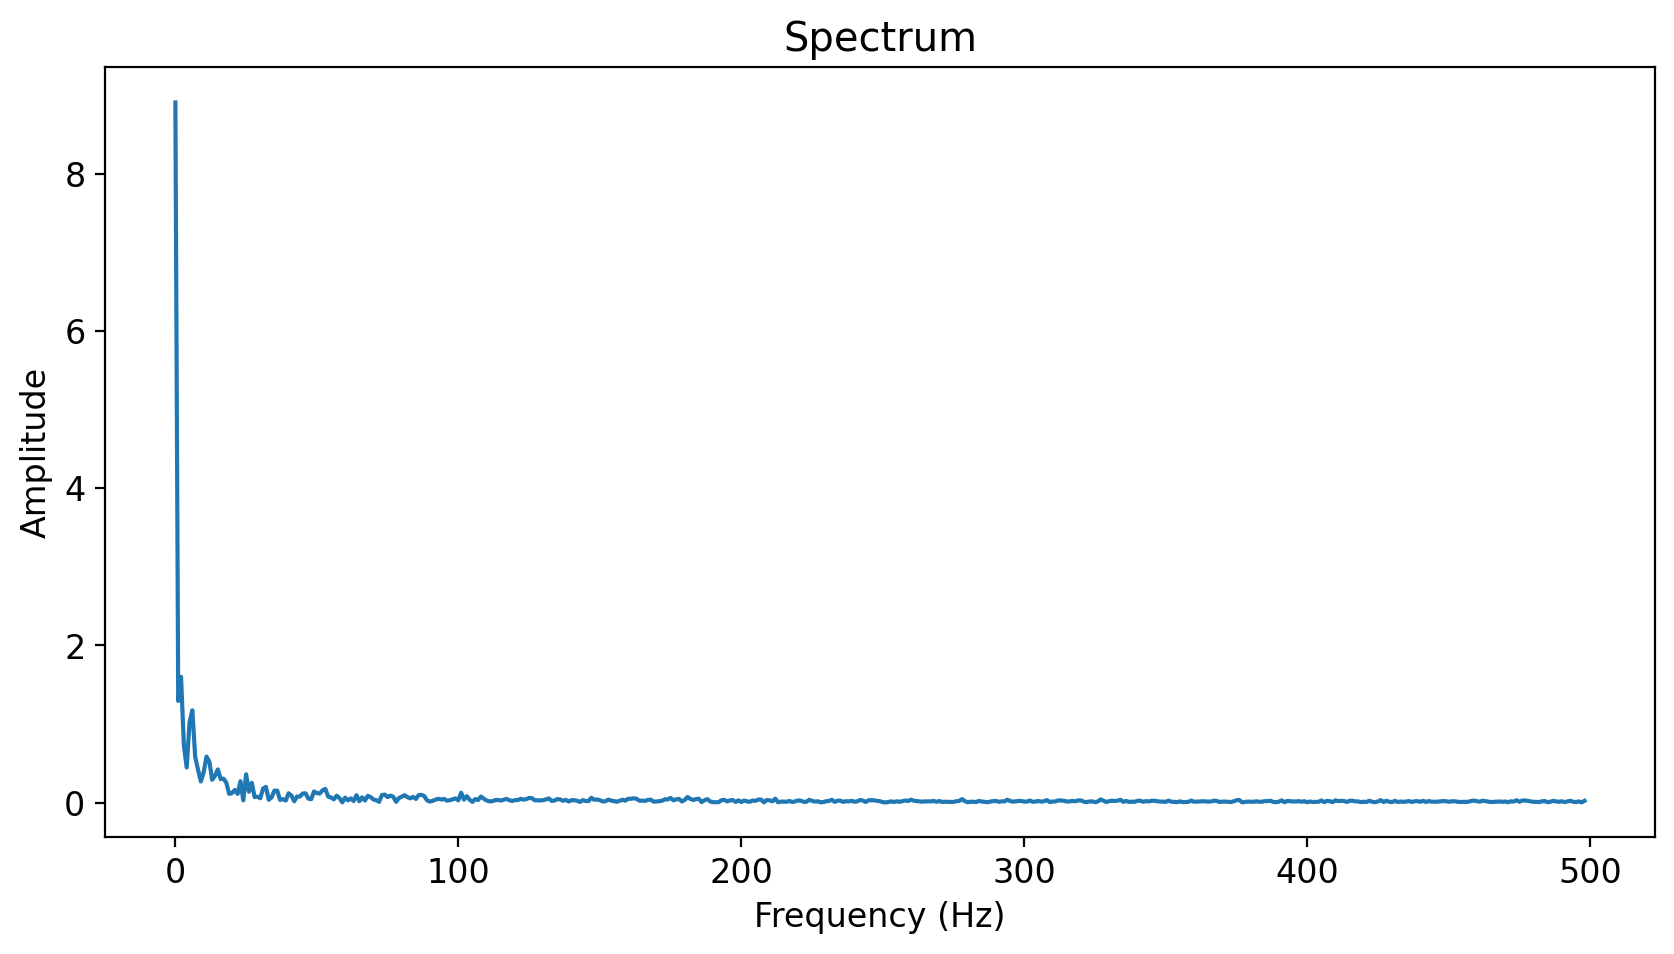

In [7]:
fourier(df2['close'])

In [10]:
!pip install pymssa

ERROR: Could not find a version that satisfies the requirement pymssa (from versions: none)
ERROR: No matching distribution found for pymssa


In [11]:
!pip install git+https://github.com/kieferk/pymssa.git

  Cloning https://github.com/kieferk/pymssa.git to /tmp/pip-req-build-efnme9k3
  Running command git clone --filter=blob:none --quiet https://github.com/kieferk/pymssa.git /tmp/pip-req-build-efnme9k3
  Resolved https://github.com/kieferk/pymssa.git to commit 9d4d3e2c317ef64d0604796cf3fbdf9b5dc8e7fe
  Preparing metadata (setup.py) ... done
  Created wheel for pymssa: filename=pymssa-0.1.0-py3-none-any.whl size=13848 sha256=7968d1bd2182aa03391c838bdb7dd634ee4da6c727c260cf5015067cde3a6e89
  Stored in directory: /tmp/pip-ephem-wheel-cache-f77gvc17/wheels/d9/d3/ff/cdbc753eaa7018b7b443cef4bf0cd5d42b1be5247471a31fc8
Successfully built pymssa


Constructing trajectory matrix
Trajectory matrix shape: (10, 991)
Decomposing trajectory covariance matrix with SVD
Constructing components
Calculating optimal reconstruction orders


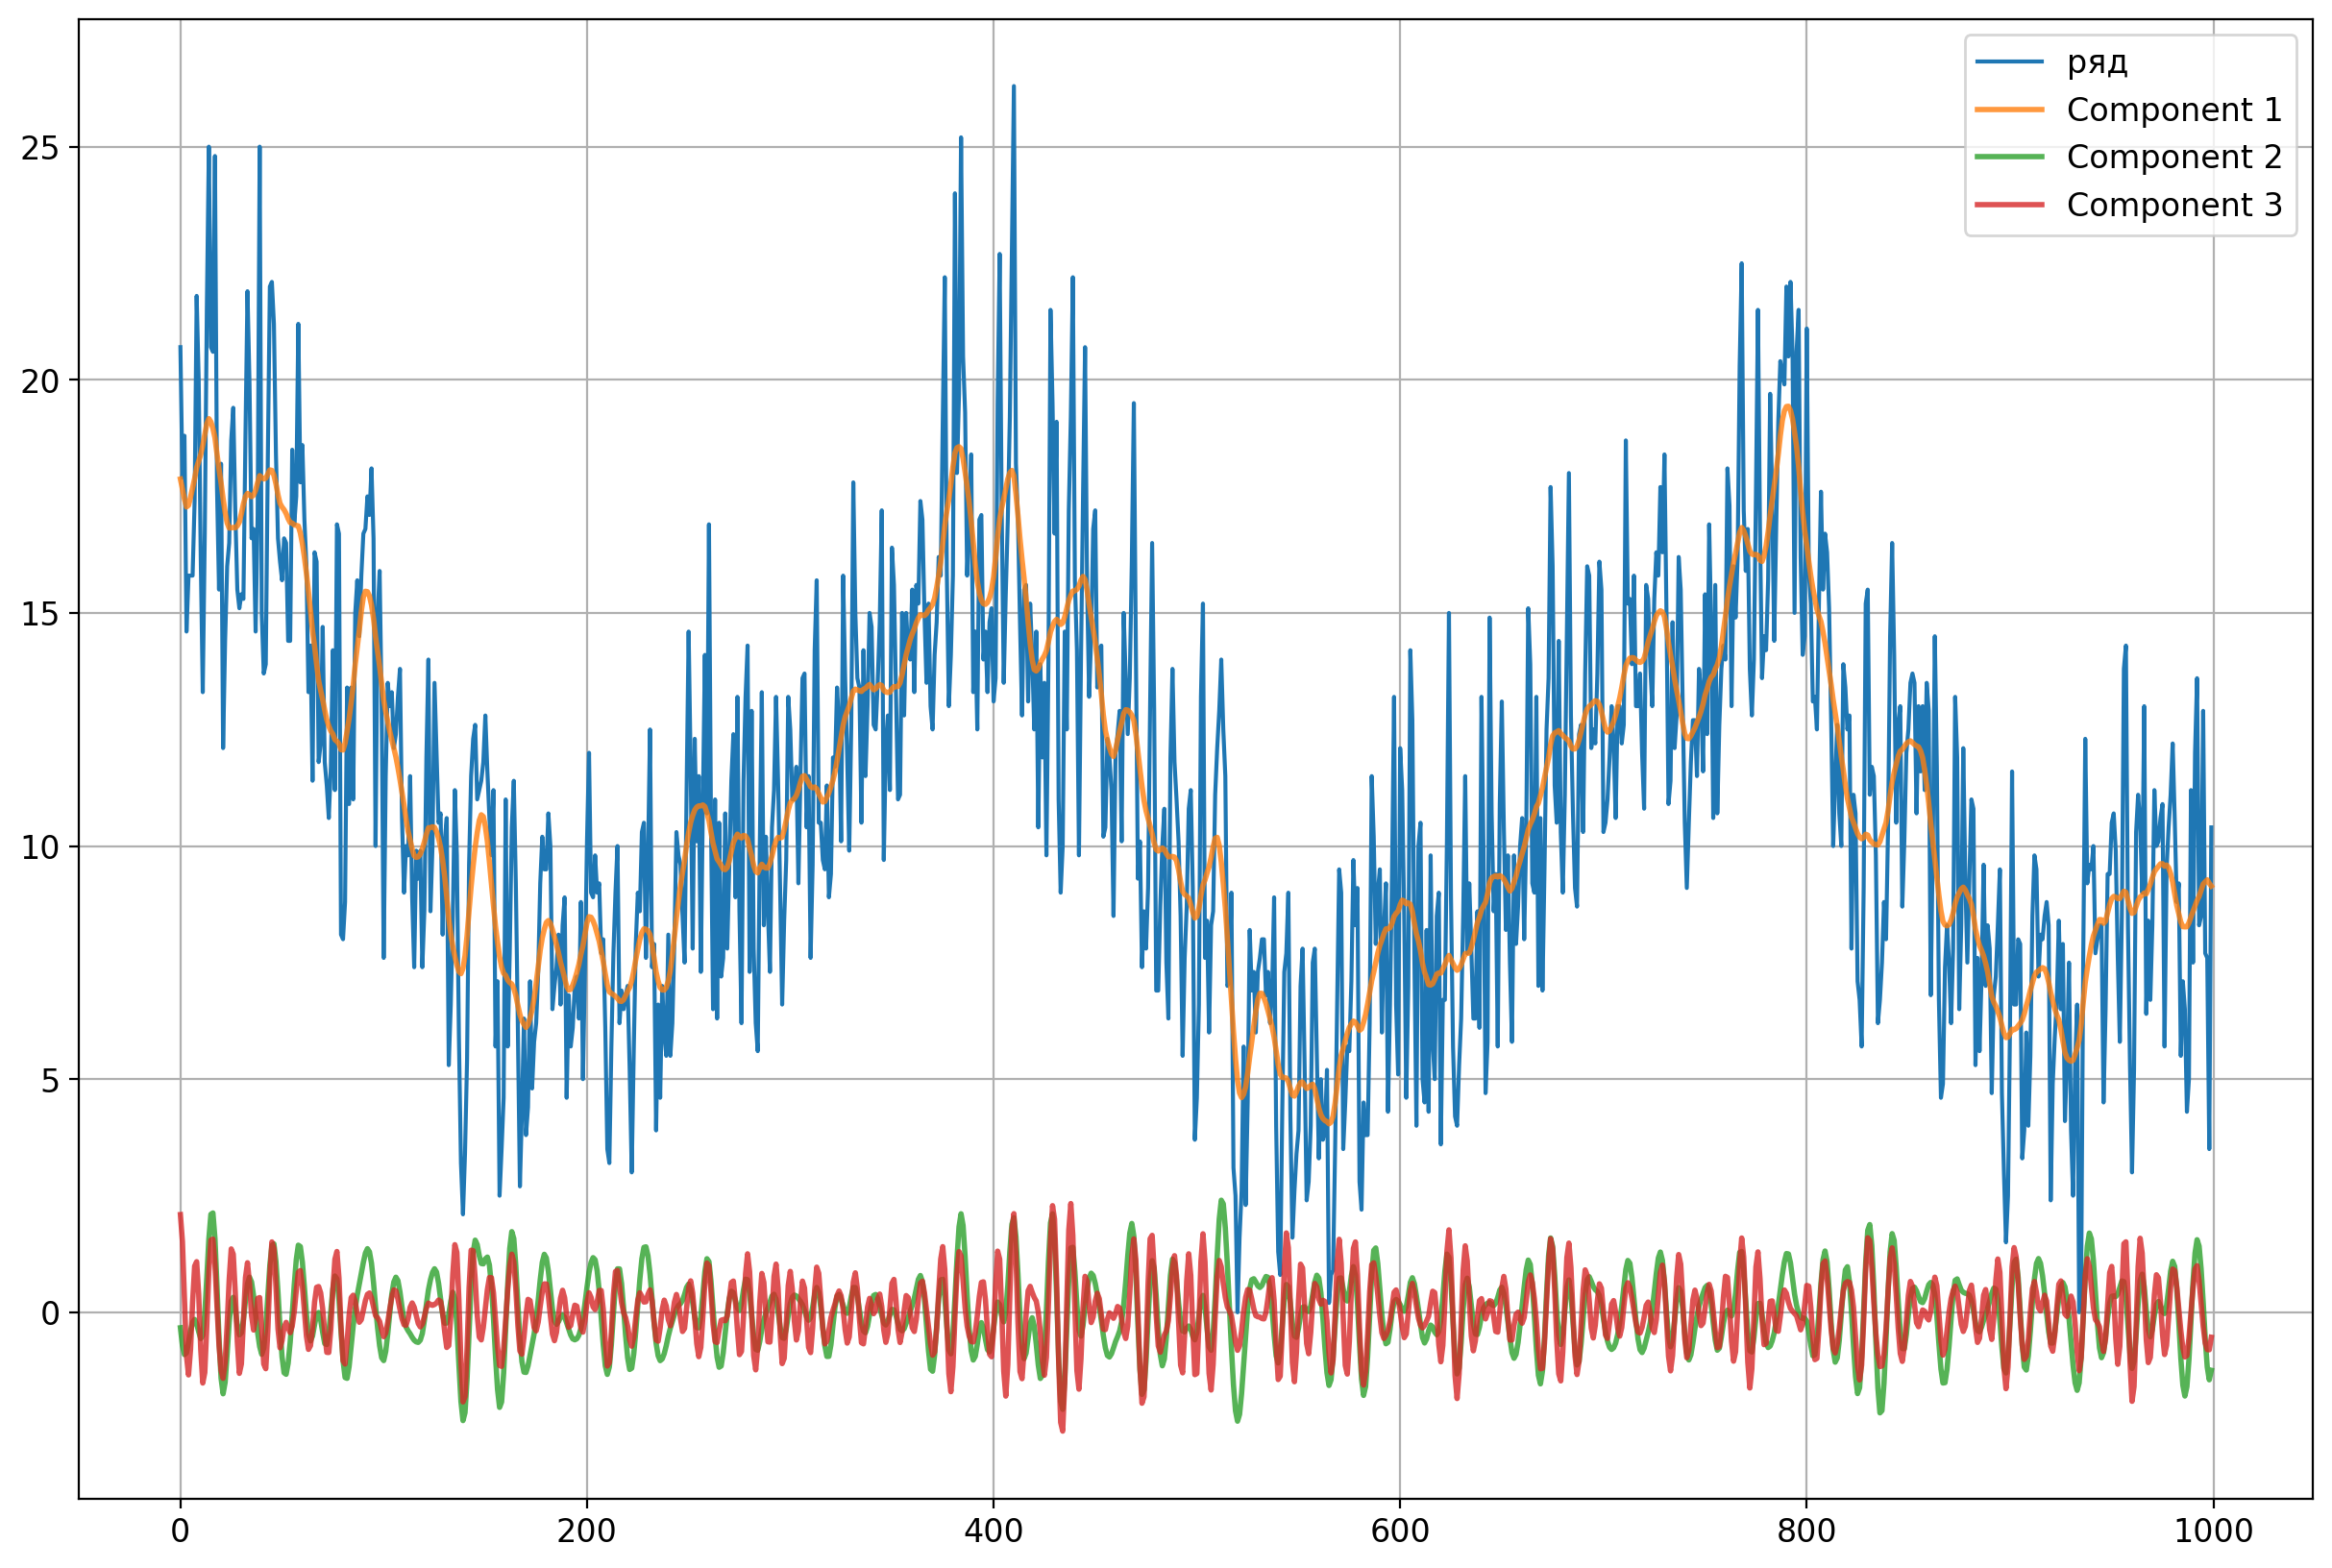

In [18]:
from pymssa import MSSA

mssa_temp = MSSA(n_components=3,
            window_size=10,
            verbose=True)

mssa_temp.fit(df['Temp'])

fig=plt.figure(figsize=(15, 10))
plt.plot(df['Temp'], label='ряд')
plt.grid()

for idx in range(3):
    component = mssa_temp.components_[0, :, idx]
    plt.plot(df['Temp'].index, component, lw=2, alpha=0.8, label=f'Component {idx + 1}')

plt.legend()

Constructing trajectory matrix
Trajectory matrix shape: (100, 901)
Decomposing trajectory covariance matrix with SVD
Constructing components
Calculating optimal reconstruction orders


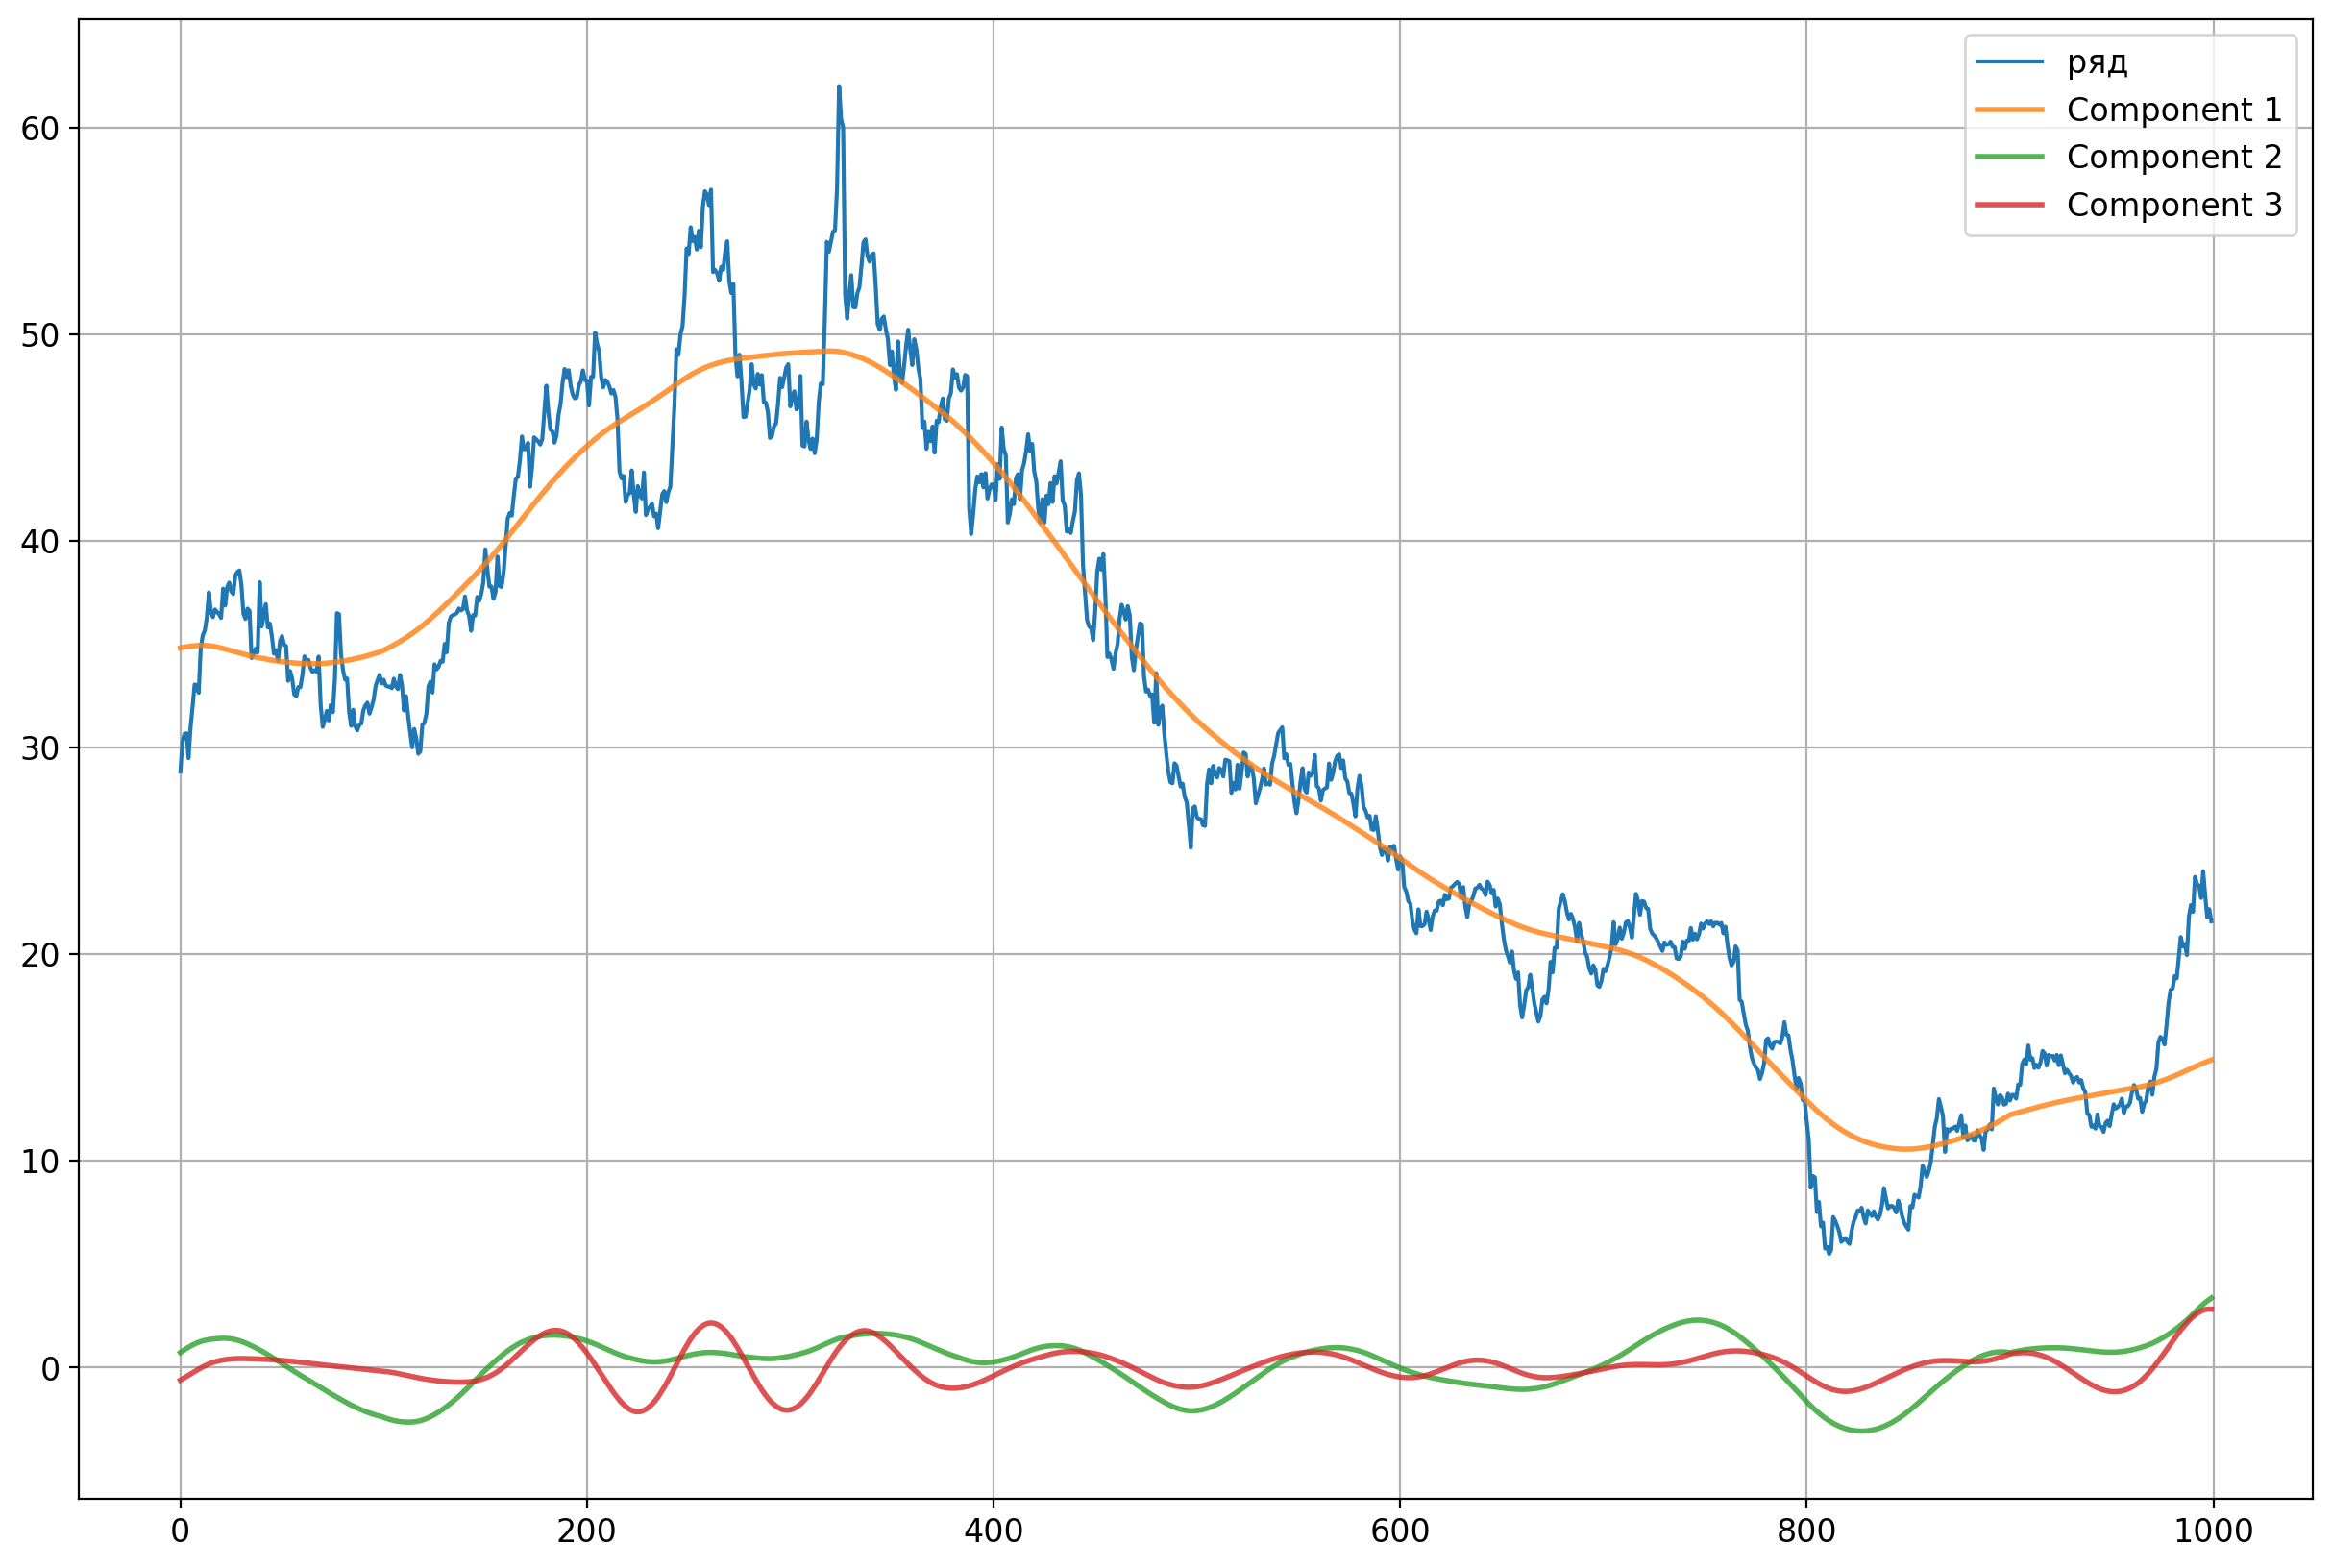

In [24]:
mssa_stock = MSSA(n_components=3,
            window_size=100,
            verbose=True)

mssa_stock.fit(df2['close'])

fig=plt.figure(figsize=(15, 10))
plt.plot(df2['close'], label='ряд')
plt.grid()

for idx in range(3):
    component = mssa_stock.components_[0, :, idx]
    plt.plot(df2['close'].index, component, lw=2, alpha=0.8, label=f'Component {idx + 1}')

plt.legend()